<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 02
*28 de Septiembre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez - Cristián Pizarro - César Soto - Rosario Valderrama Labarca`

In [28]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install scikit-learn

In [43]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


In [49]:
# Imprimir la paleta de colores en Código RGBa
def print_paleta(paleta,etiqueta ):
    print(f"\nPaleta de colores usando {etiqueta}:")
    for i, color in enumerate(paleta):
        print(f"Color {i+1}: {color}")
        
def img_paleta(colores):
    plt.figure(figsize=(12, 2))
    plt.title('Colores promedio')
    plt.imshow([colores])  # Mostrar los colores obtenidos
    plt.axis('off')
    plt.show()


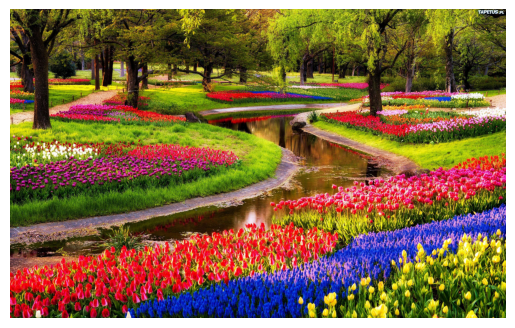

In [45]:
# Ruta relativa a la imagen en la carpeta 'data'
image_path = '../data/Imagen_L2_ML.jpg'  # Ajusta la ruta si es necesario
image_path = '../data/flores3.png'  # Ajusta la ruta si es necesario
image = Image.open(image_path)

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # No mostrar los ejes
plt.show()

Convertimos la imagen en matriz de pixeles: toma la imagen y la convierte en una matriz 2D de píxeles, cada uno representado por valores RGB.

In [46]:
# Convertir la imagen a una matriz de píxeles
image_np = np.array(image)
print(f"Forma original de la imagen: {image_np.shape}")
# pixels = image_np.reshape(-1, 3)
pixels = image_np.reshape(-1, 4)

# Mostrar las formas
print(f"Forma de la imagen convertida en píxeles: {pixels.shape}")


Forma original de la imagen: (920, 1479, 4)
Forma de la imagen convertida en píxeles: (1360680, 4)


# 1) Aplicamos k-means:

## *Probamos con 6 clusters y vemos que la "intertia" se da en el 3.*

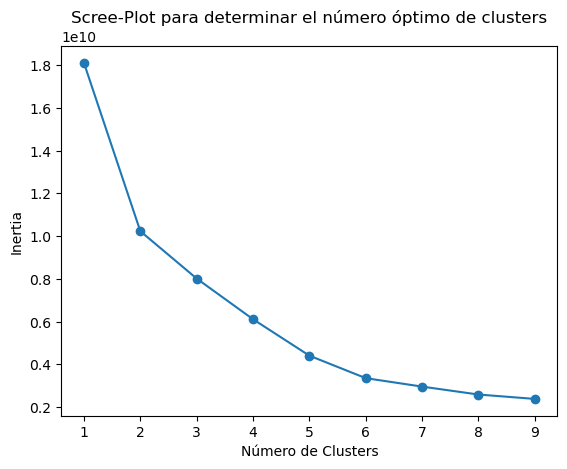

In [47]:
# Probar diferentes números de clusters y calcular la "inertia" (distancia intracluster)
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el scree-plot
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Scree-Plot para determinar el número óptimo de clusters')
plt.show()


Decidimos finalmente aplicar K-means con 3 clusters para reducir la paleta de colores de la imagen. Luego procederemos con el clustering jerárquico y las mezclas de gaussianas.

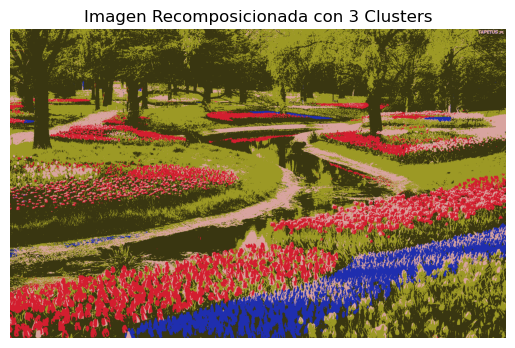

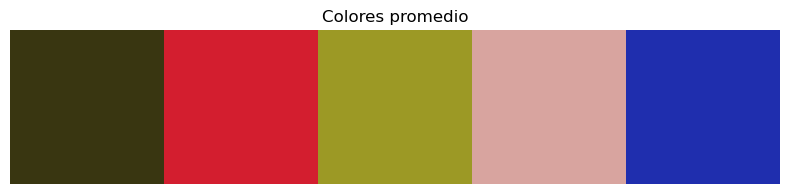


Paleta de colores usando KMeans:
Color 1: [ 57  54  17 255]
Color 2: [211  30  47 255]
Color 3: [156 153  37 255]
Color 4: [216 164 159 255]
Color 5: [ 31  46 174 255]


In [50]:
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixels)

# Obtener los colores (centroides) de los clusters
centroids = np.array(kmeans.cluster_centers_, dtype='uint8')

# Asignar cada píxel a su color más cercano (cluster)
labels = kmeans.labels_

# Recomponer la imagen con los colores reducidos (3 clusters)
reconstructed_image = centroids[labels].reshape(image_np.shape)

# Mostrar la imagen recomposicionada
plt.imshow(reconstructed_image)
plt.axis('off')  # No mostrar los ejes
plt.title('Imagen Recomposicionada con 3 Clusters')
plt.show()
img_paleta(centroids)
print_paleta(centroids, "KMeans")


### *Probamos comparación de las 3 opciones analizadas*

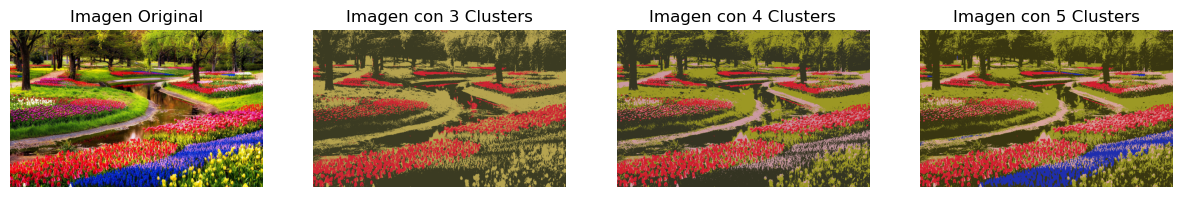


Paleta de colores usando Imagen con 3 Clusters:
Color 1: [ 59  59  34 255]
Color 2: [208  35  50 255]
Color 3: [182 164  80 255]


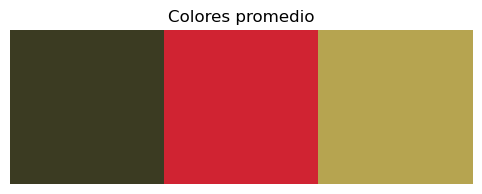


Paleta de colores usando Imagen con 4 Clusters:
Color 1: [ 52  52  34 255]
Color 2: [210  30  45 255]
Color 3: [156 152  36 255]
Color 4: [204 154 164 255]


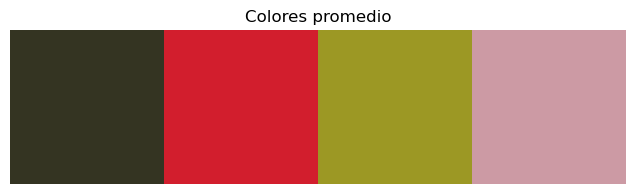


Paleta de colores usando Imagen con 5 Clusters:
Color 1: [ 57  54  17 255]
Color 2: [211  30  47 255]
Color 3: [156 153  37 255]
Color 4: [216 164 159 255]
Color 5: [ 31  46 174 255]


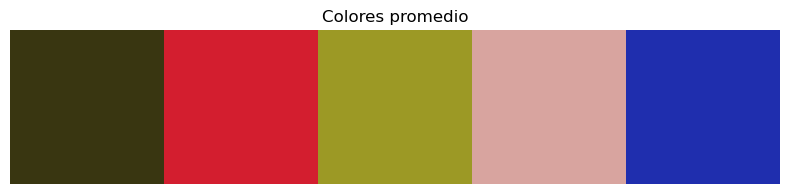

In [54]:
# Función para aplicar KMeans y recomponer la imagen con un número dado de clusters
def apply_kmeans_and_reconstruct(n_clusters, pixels, image_shape):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    centroids = np.array(kmeans.cluster_centers_, dtype='uint8')
    labels = kmeans.labels_
    reconstructed_image = centroids[labels].reshape(image_shape)
    return reconstructed_image, centroids

# Aplicar KMeans para 3, 5 y 6 clusters
image_3_clusters,centroids1 = apply_kmeans_and_reconstruct(3, pixels, image_np.shape)
image_5_clusters,centroids2 = apply_kmeans_and_reconstruct(4, pixels, image_np.shape)
image_6_clusters,centroids3 = apply_kmeans_and_reconstruct(5, pixels, image_np.shape)

# Mostrar las imágenes recompuestas para comparar visualmente
plt.figure(figsize=(15, 5))

# Mostrar la imagen
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')  # No mostrar los ejes

plt.subplot(1, 4, 2)
plt.imshow(image_3_clusters)
plt.axis('off')
plt.title('Imagen con 3 Clusters')

plt.subplot(1, 4, 3)
plt.imshow(image_5_clusters)
plt.axis('off')
plt.title('Imagen con 4 Clusters')

plt.subplot(1, 4, 4)
plt.imshow(image_6_clusters)
plt.axis('off')
plt.title('Imagen con 5 Clusters')


plt.show()



print_paleta(centroids1, 'Imagen con 3 Clusters')
img_paleta(centroids1)
print_paleta(centroids2, 'Imagen con 4 Clusters')
img_paleta(centroids2)
print_paleta(centroids3, 'Imagen con 5 Clusters')
img_paleta(centroids3)


# 2) Gaussian Mixtures: 
#### Son otra forma de hacer clustering. Mientras que Kmeans asume los clusters esféricos y de tamaño similar, GMM permite que los clusters tengan diferentes formas, tamaños y distribuciones. En lugar de asignar un dato a un único cluster, GMM asignga probabilidades a los datos, los que significa que cada punto tiene una probabilidad de pertenecer a cada cluster.

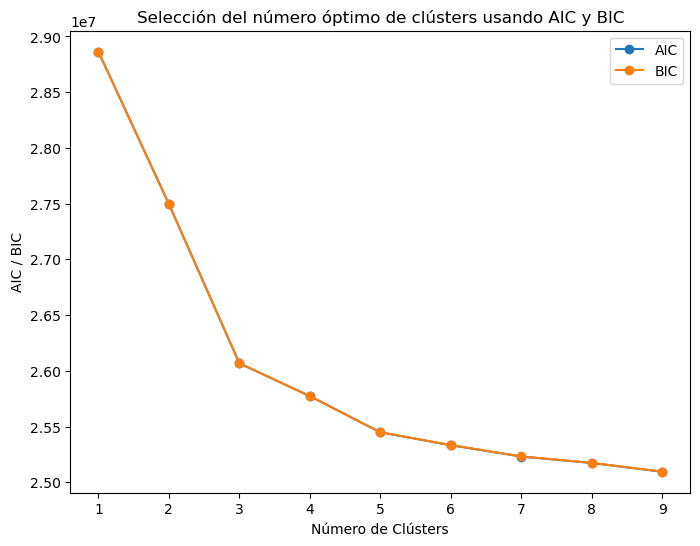

In [36]:
# Asumiendo que tienes tus datos en la variable `X`
# Generar modelos GMM para diferentes números de clústers
n_clusters = range(1, 10)  # Puedes ajustar el rango según tus datos
aic = []
bic = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(pixels)
    aic.append(gmm.aic(pixels))
    bic.append(gmm.bic(pixels))

# Graficar AIC y BIC
plt.figure(figsize=(8, 6))
plt.plot(n_clusters, aic, label='AIC', marker='o')
plt.plot(n_clusters, bic, label='BIC', marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('AIC / BIC')
plt.title('Selección del número óptimo de clústers usando AIC y BIC')
plt.legend()
plt.show()

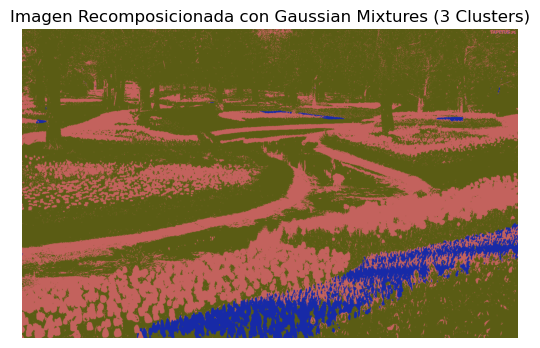

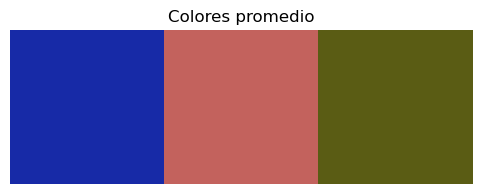


Paleta de colores usando Imagen Recomposicionada con Gaussian Mixtures (3 Clusters):
Color 1: [ 23  42 167 255]
Color 2: [195  97  92 254]
Color 3: [ 90  92  20 255]


In [55]:
# Convertir la imagen a una matriz de píxeles (de RGB a una matriz 2D de valores de color)
image_np = np.array(image)
pixels = image_np.reshape(-1, 4)

# Aplicar Gaussian Mixture Model (GMM) con 3 clusters
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(pixels)

# Obtener los clusters y las probabilidades de pertenencia
labels = gmm.predict(pixels)
centroids = np.array(gmm.means_, dtype='uint8')  # Los centroides son las medias de las gaussianas

# Recomponer la imagen con los colores resultantes de las gaussianas
reconstructed_image_gmm = centroids[labels].reshape(image_np.shape)

# Mostrar la imagen recomposicionada
plt.imshow(reconstructed_image_gmm)
plt.axis('off')
plt.title(f'Imagen Recomposicionada con Gaussian Mixtures ({n_clusters} Clusters)')
plt.show()
img_paleta(centroids)
print_paleta(centroids, f'Imagen Recomposicionada con Gaussian Mixtures ({n_clusters} Clusters)')


Este scree-plot muestra un cambio de dirección notorio al rededor de 3 clusters. Esto confirma que 3 sería un buen número para agregar colores para recomponer la imagen. Si agregamos más clusters no reduciría variablemente la variabilidad.

# 3) Clustering Jerárquico: 
#### Aplicar este algoritmo para encontrar agrupaciones en los datos basadas en una jerarquía de similitudes entre puntos (Para agrupar los píxeles similares).

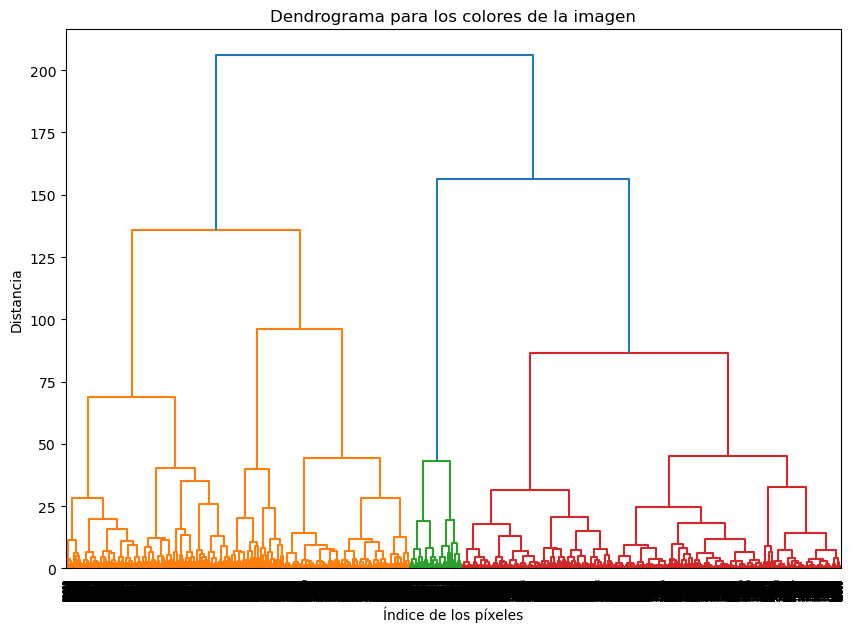

In [38]:
# Paso 1: Cargar la imagen y convertirla a un array de píxeles
# image_path = '../data/flores3.png'  # Cambia esto por la ruta de tu imagen
image = Image.open(image_path)
image = image.resize((150, 150))
pixels = np.array(image) 

# Paso 2: Reestructurar la matriz para tener una lista de píxeles en forma de (n, 3)
# Donde n es el número de píxeles y 3 son las coordenadas RGB
pixels = pixels.reshape((-1, 4))

# Paso 3: Escalar los valores de los píxeles (esto es opcional, pero ayuda a normalizar los datos)
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

# Paso 4: Realizar clustering jerárquico
Z = linkage(pixels_scaled, method='ward')

# Paso 5: Graficar el dendrograma para determinar el número óptimo de clústers
plt.figure(figsize=(10, 7))
plt.title('Dendrograma para los colores de la imagen')
plt.xlabel('Índice de los píxeles')
plt.ylabel('Distancia')
dendro = dendrogram(Z)
plt.show()


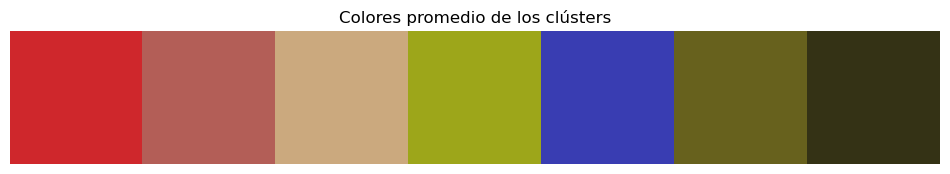


Paleta de colores usando :
Color 1: [207  39  44 255]
Color 2: [179  94  87 255]
Color 3: [203 169 126 255]
Color 4: [157 166  26 255]
Color 5: [ 57  61 178 255]
Color 6: [103  97  29 255]
Color 7: [ 52  50  21 255]


In [39]:
# Paso 6: Cortar el dendrograma para obtener los clústers (elige la distancia o el número de clústers óptimo)
max_d = 50  # Ajusta esta distancia de corte según el dendrograma
clusters = fcluster(Z, max_d, criterion='distance')

# Paso 7: Tomar los colores promedio de cada clúster
# Re-escalar los colores al rango original
clusters_unique = np.unique(clusters)
cluster_colors = []

for cluster in clusters_unique:
    cluster_pixels = pixels[clusters == cluster]
    cluster_mean = cluster_pixels.mean(axis=0)
    cluster_colors.append(cluster_mean)

# Paso 8: Visualizar los colores reestructurados de la imagen
cluster_colors = np.array(cluster_colors).astype(np.uint8)

plt.figure(figsize=(12, 2))
plt.title('Colores promedio de los clústers')
plt.imshow([cluster_colors])  # Mostrar los colores obtenidos
plt.axis('off')
plt.show()

print_paleta(cluster_colors, '')

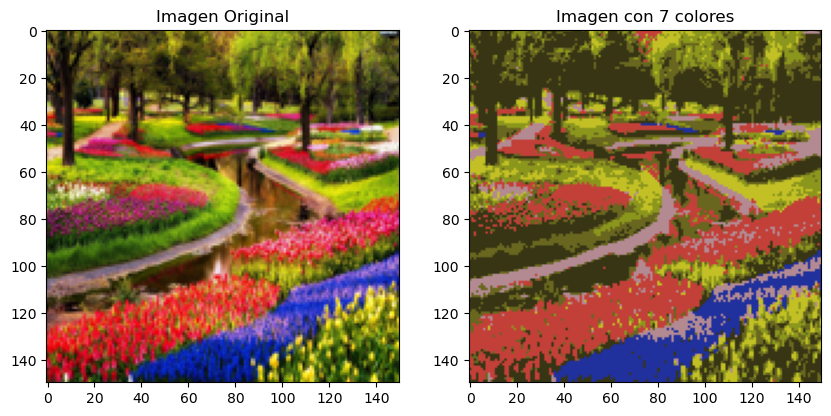

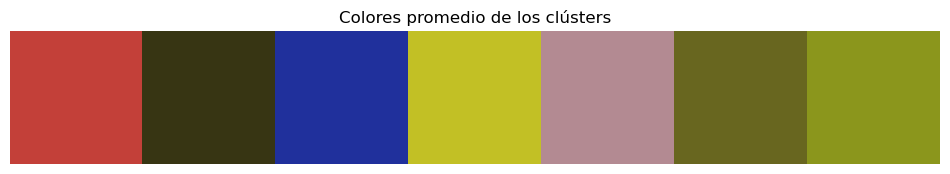


Paleta de colores usando Imagen con 7 colores:
Color 1: [195  64  57 255]
Color 2: [ 55  53  19 255]
Color 3: [ 32  48 156 255]
Color 4: [194 192  37 255]
Color 5: [179 138 146 255]
Color 6: [104 102  31 255]
Color 7: [139 150  28 255]


In [41]:
# Reducir la resolución de la imagen para evitar problemas de memoria
# image = image.resize((300, 300))  # Cambiar a una resolución más manejable (300x300 píxeles)
image = Image.open(image_path)
# image = image.convert('RGB')  # Convertir a RGB en caso de que no esté en ese formato
image = image.resize((150, 150))  # Cambiar a una resolución más manejable (150x150 píxeles)

# Convertir la imagen a un array de numpy y normalizar los valores
data = np.array(image) / 255.0
original_shape = data.shape

# Aplanar los píxeles de la imagen (de 2D a 1D)
pixels = data.reshape(-1, 4)

# Aplicar Clustering Jerárquico
n_clusters = 7  # Puedes ajustar este valor según cuántos colores quieras en la imagen final
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(pixels)

# Obtener los colores medios para cada cluster
colors = np.array([pixels[labels == i].mean(axis=0) for i in range(n_clusters)])

# Asignar los nuevos colores a los píxeles
new_image_pixels = colors[labels].reshape(original_shape)

# Mostrar la imagen original y la nueva imagen con colores reducidos
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)

# Imagen con reducción de colores
plt.subplot(1, 2, 2)
plt.title(f"Imagen con {n_clusters} colores")
plt.imshow(new_image_pixels)

plt.show()

plt.figure(figsize=(12, 2))
plt.title('Colores promedio de los clústers')
plt.imshow([(colors * 255).astype(int)])  # Mostrar los colores obtenidos
plt.axis('off')
plt.show()

print_paleta((colors * 255).astype(int), f'Imagen con {n_clusters} colores')
